In [ ]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import openpyxl

In [ ]:
df = pd.read_excel("DataAnalyst_Assesment_Dataset.xlsx", sheet_name=0)
conn = sqlite3.connect("Bookings.db")
cursor = conn.cursor()

df.to_sql("bookings", conn, if_exists="replace", index=False)

print("Excel data loaded into SQLite successfully!")

Excel data loaded into SQLite successfully!


In [3]:
df.head(5)

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [ ]:
query = "SELECT * FROM bookings;"
df_sql = pd.read_sql_query(query, conn)
print(df_sql)

                               Booking ID  \
0    279d92c6-ce26-47c0-8915-e45b77fe20e2   
1    415bfcbe-1a2e-4d4b-809a-4c5b606653b1   
2    2100024b-46fc-47b5-ac1c-047d007a4723   
3    74936def-088f-4d34-bad1-dfa76f78b704   
4    6272b4e7-a508-4ed7-bae0-21f7293287a8   
..                                    ...   
995  b45c041f-6199-4a53-8841-1afd696d8c2d   
996  633d1590-d9b2-4263-9b29-8589333c7a0a   
997  c552c1b5-bb2e-46a5-b5c9-43101cf39133   
998  09fb0473-56cc-4624-9c5a-e9cd152acc41   
999  552b1c51-61e3-4005-a57c-ff953a2c87b7   

                              Customer ID  Customer Name    Booking Type  \
0    00901ce3-3d86-4c97-bca2-40ccac2fb99f     Customer 1        Facility   
1    b82db986-bd52-4b07-bdd8-aa8cf2016241     Customer 2  Birthday Party   
2    6bbb6e83-9577-4f64-80b0-f073132d18f3     Customer 3  Birthday Party   
3    f16f5beb-6a7d-4493-a19e-a30dbbd206e9     Customer 4  Birthday Party   
4    eb297435-93d1-4e65-8dd4-6450922305cb     Customer 5           Class   
.. 

In [ ]:
try:
    # Create the table if it doesn’t exist
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS bookings_records (
        "Booking ID" INTEGER,
        "Booking Type" TEXT,
        "Booking Date" TEXT,
        "Status" TEXT,
        "Time Slot" TEXT,
        "Duration (mins)" INTEGER,
        "Price" REAL,
        "Facility" TEXT,
        "Service Name" TEXT,
        "Service Type" TEXT
    );
    """)

    # Clear old data to prevent duplicates
    cursor.execute("DELETE FROM bookings_records;")

    # Insert fresh data from the existing bookings table
    cursor.execute("""
    INSERT INTO bookings_records 
    SELECT 
        "Booking ID", "Booking Type", "Booking Date", "Status", 
        "Time Slot", "Duration (mins)", "Price", "Facility", 
        "Service Name", "Service Type"
    FROM bookings;
    """)

    # Remove the old table
    cursor.execute("DROP TABLE bookings;")

    # Rename the updated table back to bookings
    cursor.execute("ALTER TABLE bookings_records RENAME TO bookings;")

    # Fetch and display the updated data
    df_sql = pd.read_sql_query(query, conn)
    print(df_sql)

    # Confirm the update
    print("Table updated successfully!")

except sqlite3.Error as e:
    print("Error:", e)


                               Booking ID    Booking Type  \
0    279d92c6-ce26-47c0-8915-e45b77fe20e2        Facility   
1    415bfcbe-1a2e-4d4b-809a-4c5b606653b1  Birthday Party   
2    2100024b-46fc-47b5-ac1c-047d007a4723  Birthday Party   
3    74936def-088f-4d34-bad1-dfa76f78b704  Birthday Party   
4    6272b4e7-a508-4ed7-bae0-21f7293287a8           Class   
..                                    ...             ...   
995  b45c041f-6199-4a53-8841-1afd696d8c2d  Birthday Party   
996  633d1590-d9b2-4263-9b29-8589333c7a0a           Class   
997  c552c1b5-bb2e-46a5-b5c9-43101cf39133        Facility   
998  09fb0473-56cc-4624-9c5a-e9cd152acc41        Facility   
999  552b1c51-61e3-4005-a57c-ff953a2c87b7        Facility   

            Booking Date     Status        Time Slot  Duration (mins)   Price  \
0    2025-05-30 00:00:00    Pending  10:00:00.000000             90.0   42.74   
1    2025-05-29 00:00:00    Pending             None              NaN  182.06   
2    2025-05-09 00:00:00

In [ ]:

#Remove the columns that are not needed
query = """
SELECT 
    SUM(CASE WHEN "Booking ID" IS NULL THEN 1 ELSE 0 END) AS missing_booking_id,
    SUM(CASE WHEN "Booking Type" IS NULL THEN 1 ELSE 0 END) AS missing_booking_type,
    SUM(CASE WHEN "Booking Date" IS NULL THEN 1 ELSE 0 END) AS missing_booking_date,
    SUM(CASE WHEN "Status" IS NULL THEN 1 ELSE 0 END) AS missing_status,
    SUM(CASE WHEN "Time Slot" IS NULL THEN 1 ELSE 0 END) AS missing_time_slot,
    SUM(CASE WHEN "Duration (mins)" IS NULL THEN 1 ELSE 0 END) AS missing_duration,
    SUM(CASE WHEN "Price" IS NULL THEN 1 ELSE 0 END) AS missing_price,
    SUM(CASE WHEN "Facility" IS NULL THEN 1 ELSE 0 END) AS missing_facility,
    SUM(CASE WHEN "Service Name" IS NULL THEN 1 ELSE 0 END) AS missing_service_name,
    SUM(CASE WHEN "Service Type" IS NULL THEN 1 ELSE 0 END) AS missing_service_type
FROM bookings;
"""

df_nulls = pd.read_sql_query(query, conn)
df_nulls


,missing_booking_id,missing_booking_type,missing_booking_date,missing_status,missing_time_slot,missing_duration,missing_price,missing_facility,missing_service_name,missing_service_type
0,0,0,0,0,205,205,0,328,0,0


In [7]:
query = """
SELECT strftime('%Y-%m', "Booking Date") AS month, COUNT(*) AS total_bookings 
FROM bookings 
GROUP BY month 
ORDER BY month;
"""
df_bookings = pd.read_sql_query(query, conn)
print(df_bookings)


     month  total_bookings
0  2025-03              84
1  2025-04             334
2  2025-05             334
3  2025-06             248


In [8]:
df_sql.head()

,Booking ID,Booking Type,Booking Date,Status,Time Slot,Duration (mins),Price,Facility,Service Name,Service Type
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,Facility,2025-05-30 00:00:00,Pending,10:00:00.000000,90.0,42.74,Party Room,Party Room,Facility
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,Birthday Party,2025-05-29 00:00:00,Pending,None,NaN,182.06,Party Room,Party Room,Birthday Party
2,2100024b-46fc-47b5-ac1c-047d007a4723,Birthday Party,2025-05-09 00:00:00,Confirmed,11:00:00.000000,120.0,207.50,Play Area,Play Area,Facility
3,74936def-088f-4d34-bad1-dfa76f78b704,Birthday Party,2025-06-07 00:00:00,Pending,12:00:00.000000,90.0,203.20,Play Area,Play Area,Birthday Party
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,Class,2025-04-13 00:00:00,Pending,15:00:00.000000,120.0,161.14,None,Art,Class


In [9]:
print(df_sql.columns)

Index(['Booking ID', 'Booking Type', 'Booking Date', 'Status', 'Time Slot',
       'Duration (mins)', 'Price', 'Facility', 'Service Name', 'Service Type'],
      dtype='object')


In [11]:
most_common_time = df_sql['Time Slot'].value_counts()
most_common_facility = df_sql['Facility'].value_counts()

print(most_common_time)
print(most_common_facility)




Time Slot
14:00:00.000000    111
13:00:00.000000    104
11:00:00.000000     91
15:00:00.000000     88
12:00:00.000000     86
16:00:00.000000     85
10:00:00.000000     83
09:00:00.000000     81
17:00:00.000000     66
Name: count, dtype: int64
Facility
Play Area     356
Party Room    316
Name: count, dtype: int64


In [ ]:
# Fill missing time slots with the most common (mode) time slot for each booking type
time_slot_mode = df_sql.groupby('Booking Type')['Time Slot'].agg(lambda x: x.mode()[0] if not x.mode().empty else '14:00:00')
df_sql['Time Slot'] = df_sql.apply(lambda row: time_slot_mode[row['Booking Type']] if pd.isna(row['Time Slot']) else row['Time Slot'], axis=1)

# Fill missing facilities with the most common facility for the given service type
df_sql['Facility'] = df_sql.groupby('Service Type')['Facility'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Replace missing durations with a default value of 105 minutes
df_sql['Duration (mins)'].fillna(105, inplace=True)


C:\Users\MEET\AppData\Local\Temp\ipykernel_24820\3776747357.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sql['Duration (mins)'].fillna(105, inplace=True)


In [13]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Booking ID       1000 non-null   object 
 1   Booking Type     1000 non-null   object 
 2   Booking Date     1000 non-null   object 
 3   Status           1000 non-null   object 
 4   Time Slot        1000 non-null   object 
 5   Duration (mins)  1000 non-null   float64
 6   Price            1000 non-null   float64
 7   Facility         1000 non-null   object 
 8   Service Name     1000 non-null   object 
 9   Service Type     1000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 78.3+ KB


<Axes: title={'center': 'Prices Over Time'}, xlabel='Booking Date'>

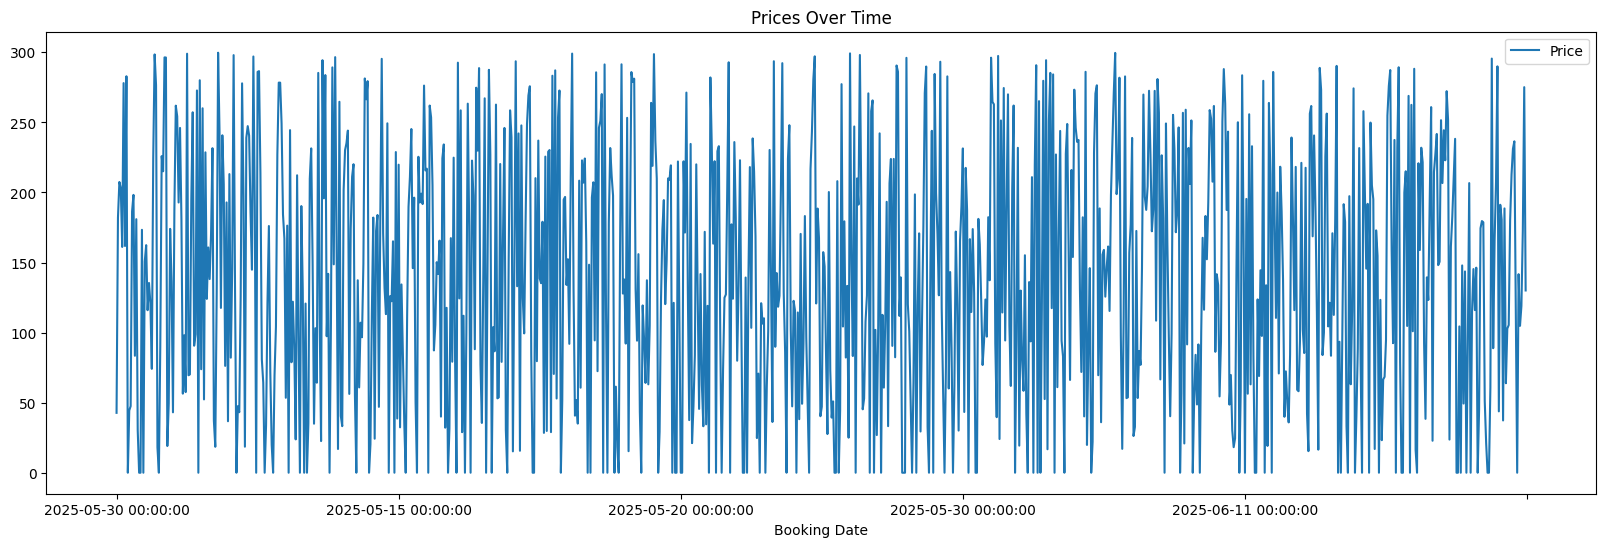

In [ ]:
df_sql.plot(x='Booking Date', y='Price', title="Prices Over Time", figsize=(20, 6))


<Axes: title={'center': 'Revenue by Facility'}, xlabel='Facility'>

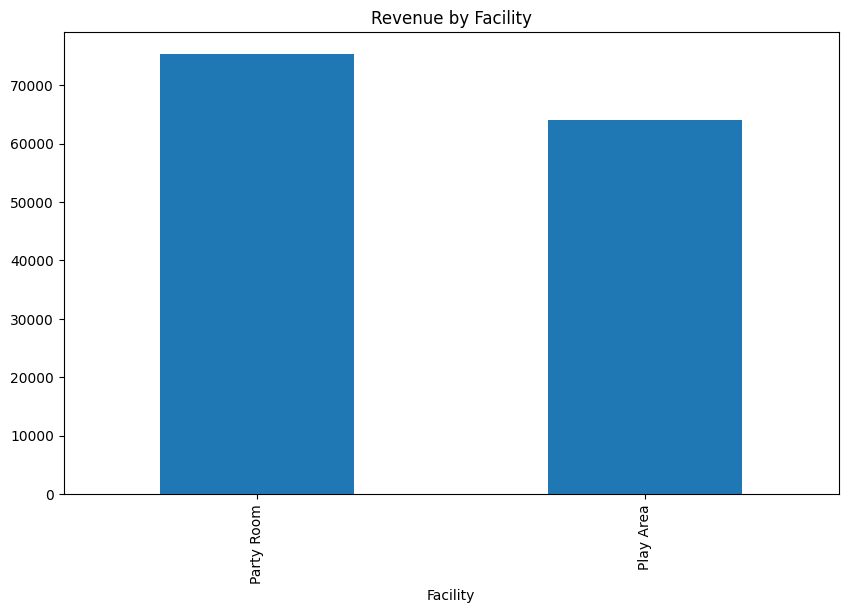

In [ ]:
df_sql.groupby('Facility')['Price'].sum().plot(kind='bar', title="Revenue by Facility", figsize=(10, 6))


<Axes: title={'center': 'Most Booked Time Slots'}, xlabel='Time Slot'>

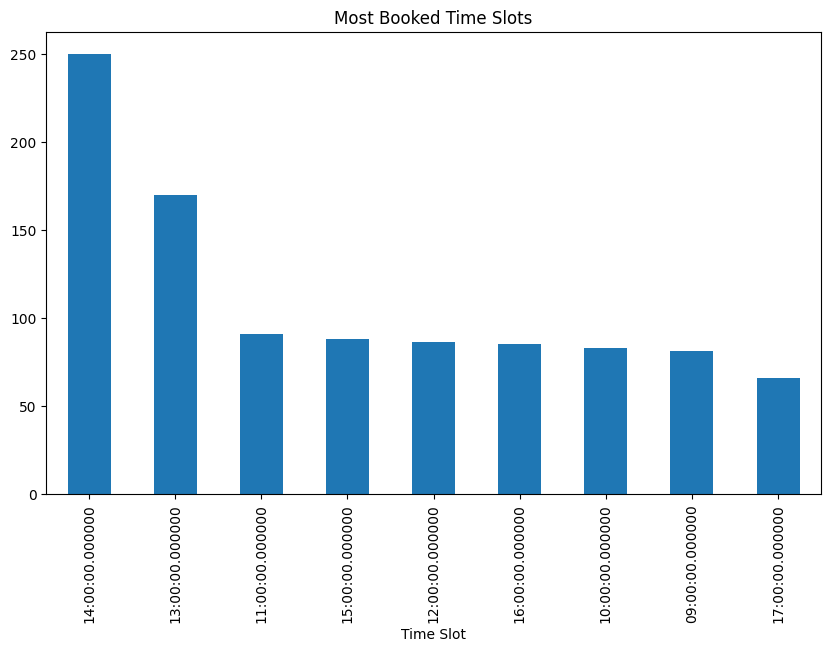

In [ ]:
df_sql['Time Slot'].value_counts().plot(kind='bar', title="Most Booked Time Slots", figsize=(10, 6))


<Axes: title={'center': 'Revenue Share by Service Type'}, ylabel='Price'>

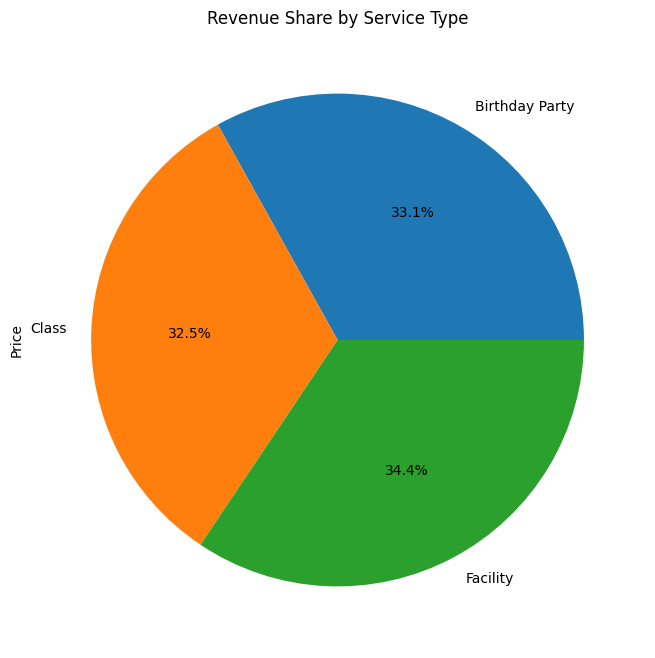

In [ ]:
df_sql.groupby('Service Type')['Price'].sum().plot(kind='pie', autopct='%1.1f%%', title="Revenue Share by Service Type", figsize=(8, 8))


<Axes: title={'center': 'Avg Duration per Facility'}, xlabel='Facility'>

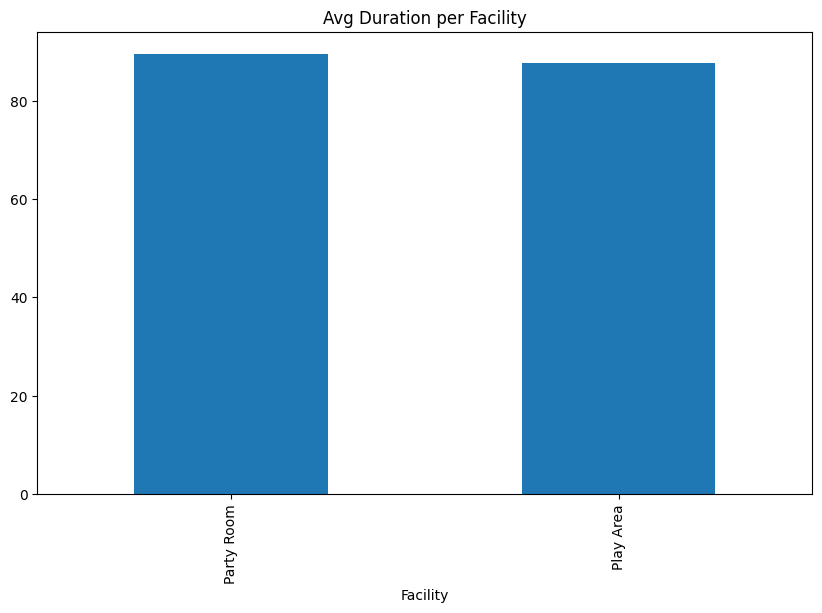

In [ ]:
df_sql.groupby('Facility')['Duration (mins)'].mean().plot(kind='bar', title="Avg Duration per Facility", figsize=(10, 6))


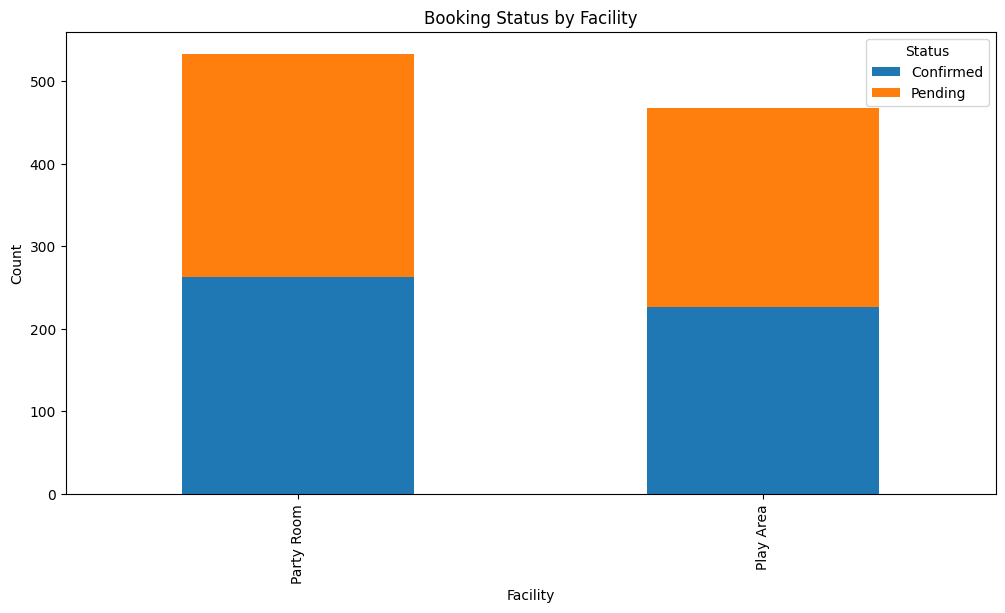

In [ ]:
df_sql.groupby(['Facility', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6), title="Booking Status by Facility")
plt.ylabel("Count")
plt.show()


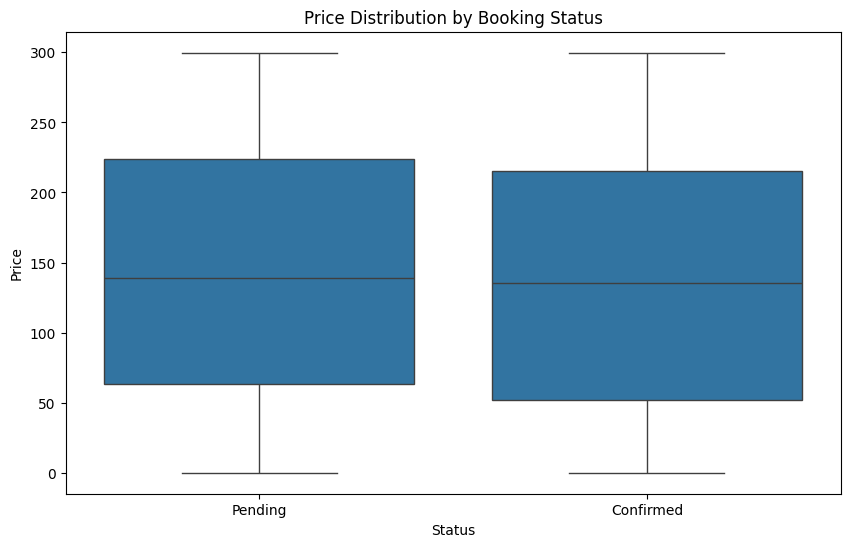

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Price', data=df_sql)
plt.title("Price Distribution by Booking Status")
plt.show()


<Axes: xlabel='Service Type'>

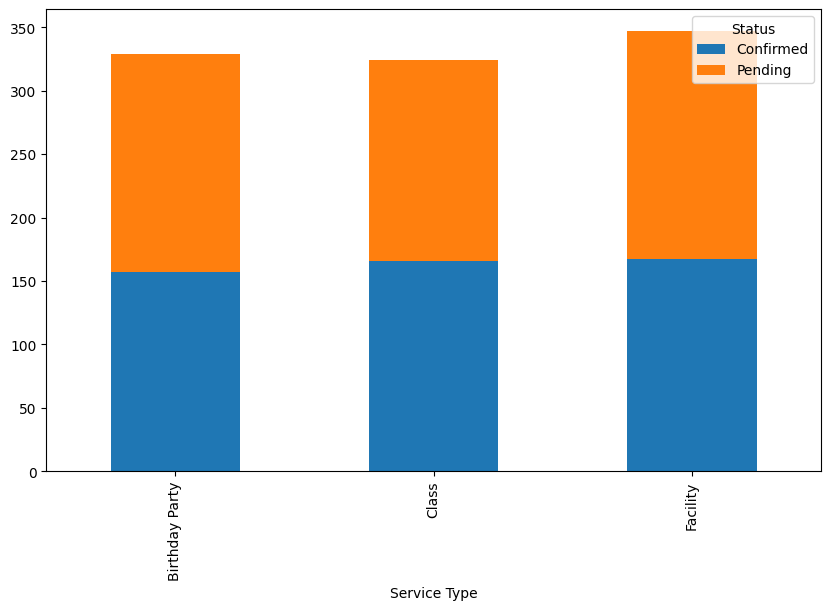

In [ ]:
df_sql.groupby(['Service Type', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))


<Axes: title={'center': 'Seasonal Revenue Trends'}, xlabel='Month'>

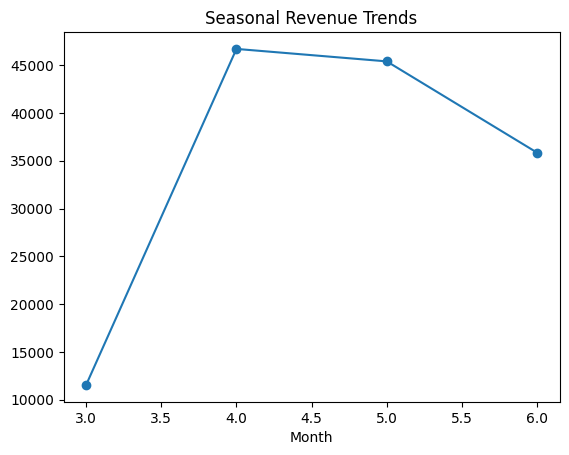

In [ ]:
# Convert 'Booking Date' column to datetime format for easier date-based analysis
df_sql['Booking Date'] = pd.to_datetime(df_sql['Booking Date'])

# Extract the month from the booking date to analyze trends across months
df_sql['Month'] = df_sql['Booking Date'].dt.month

# Group by month and sum up the prices to analyze seasonal revenue trends
df_sql.groupby('Month')['Price'].sum().plot(kind='line', marker='o', title="Seasonal Revenue Trends")


<Axes: title={'center': 'Facility Demand Over Time'}, xlabel='Booking Date'>

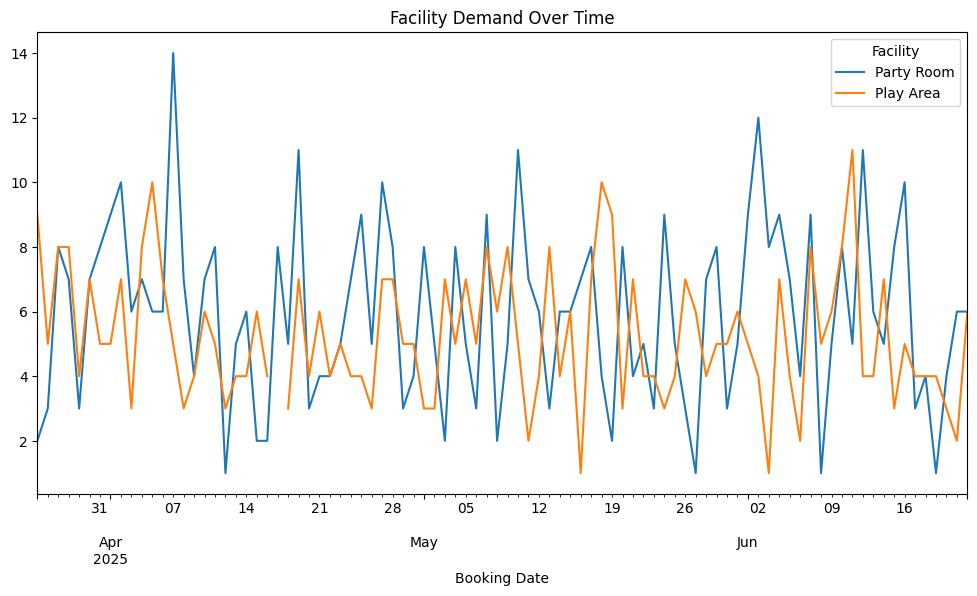

In [ ]:
df_sql.groupby(['Booking Date', 'Facility']).size().unstack().plot(figsize=(12, 6), title="Facility Demand Over Time")


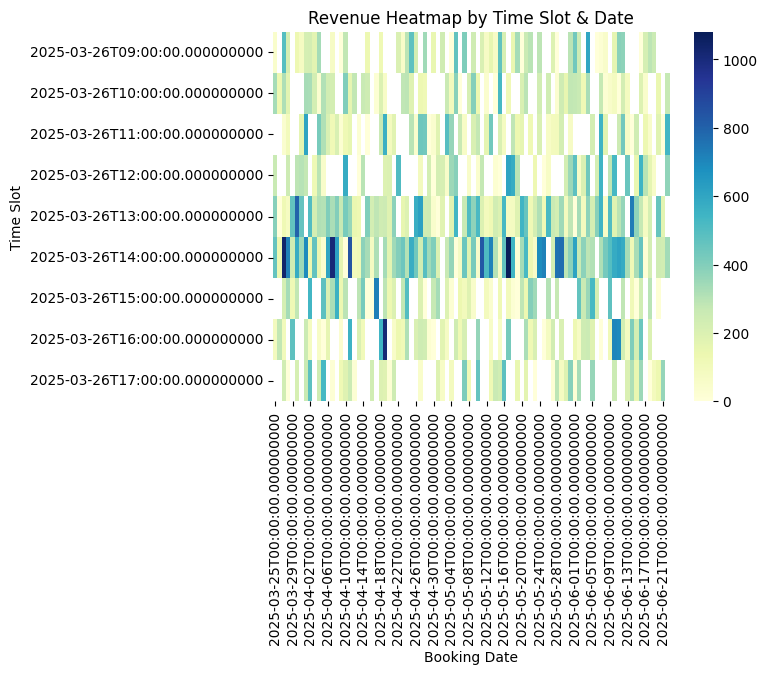

In [ ]:
heatmap_data = df_sql.pivot_table(index='Time Slot', columns='Booking Date', values='Price', aggfunc='sum')
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Revenue Heatmap by Time Slot & Date")
plt.show()